# 심층 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 2개의 층

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

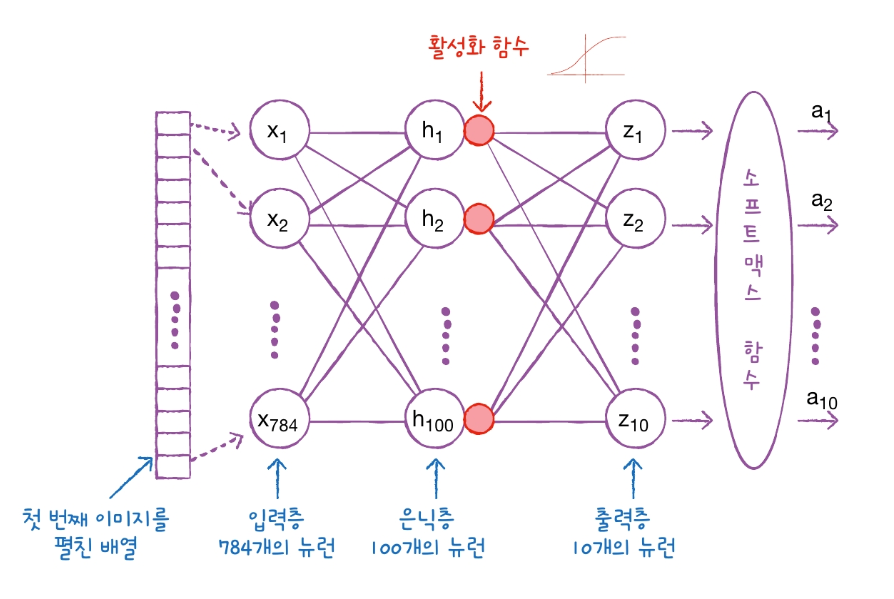

* 입력층과 출력층 사이에 있는 모든 층을 은닉층(Hidden layer)이라고 부릅니다. 
* 은닉층에는 주황색 원으로 활성화 함수가 표시되어 있습니다. 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수입니다. 
* 분류 문제를 위한 신경망의 출력층에는 시그모이드 함수나 소프트맥스 함수를 활성화 함수로 사용합니다. 
    * 이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스 함수를 사용합니다. 
    * 은닉층의 활성화 함수는 비교적 자유롭습니다.
  
-----
* 회귀를 위한 신경망의 출력층에는 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없습니다. 즉 출력층의 선형 방정식의 계산을 그대로 출력합니다. 
* 이렇게 하려면 Dense 층의 activation 매개변수에 아무런 값을 지정하지 않습니다. 

### 활성화 함수를 왜 적용하는가?
* 2개의 선형 방정식을 사용해서 예를 들어 보겠습니다. 
* 아래 그림에서 왼쪽의 첫 번째 식에서 계산된 b가 두 번째 식에서 c를 계산하기 위해서 사용됩니다. 하지만 두 번째 식에 첫 번째 식을 대입하면 오른쪽 그림처럼 하나로 합쳐질 수 있습니다. 이렇게 되면 b는 사라집니다. 
* 결국 b가 하는 일이 없는 셈입니다. 

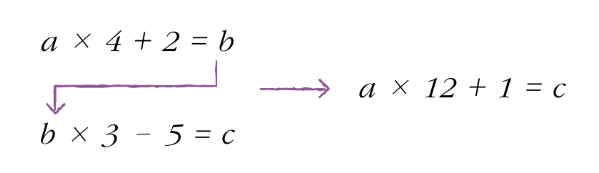

* 신경망도 마찬가지입니다. 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이 됩니다. 
* 선형 계산을 적당하게 비선형적으로 비틀어 주어야 합니다. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있습니다. 

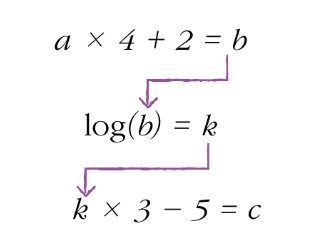

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

* 위의 코드를 보면 출력층 이전의 뉴런의 갯수를 보면 10개보다 많습니다. 만약 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달될 것입니다. 

## 심층 신경망 만들기

* Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 아래와 같이 dense1과 dense2를 리스트로 만들어 전달합니다. 

In [4]:
model = keras.Sequential([dense1, dense2])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* 층의 이름을 지정하지 않으면 dense라고 이름을 자동을 붙입니다. 
* 출력 크기를 보면 None, 100 입니다. 첫 번째 차원은 샘플의 개수를 나타냅니다. 
* 샘플의 개수가 아직 정의되어 있지 않기 때문에 None입니다. 
* fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번 걸쳐 미니배치 경사 하강법 단계를 수행합니다. 
* 케라스의 기본 미니배치 크기는 32입니다. 이 값을 fit() 메서드에서 batch_size 매개변수로 변경할 수 있습니다. 

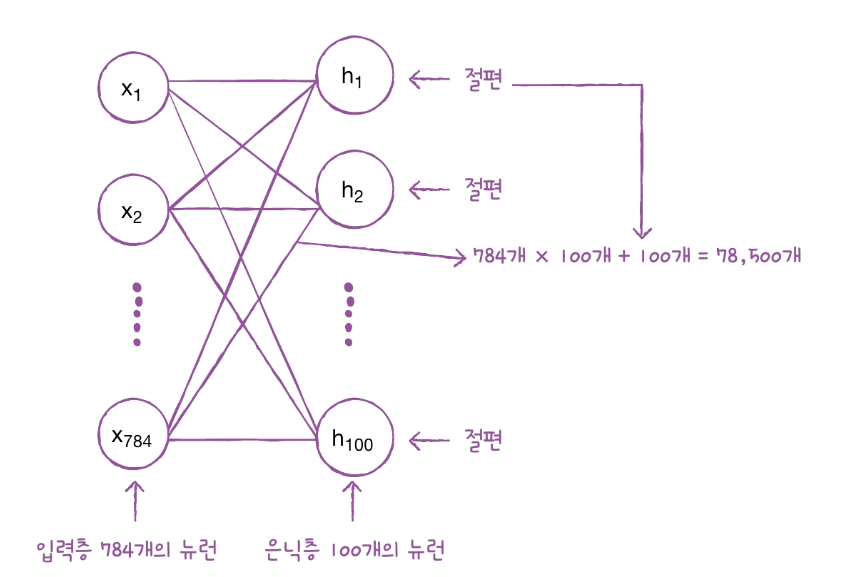

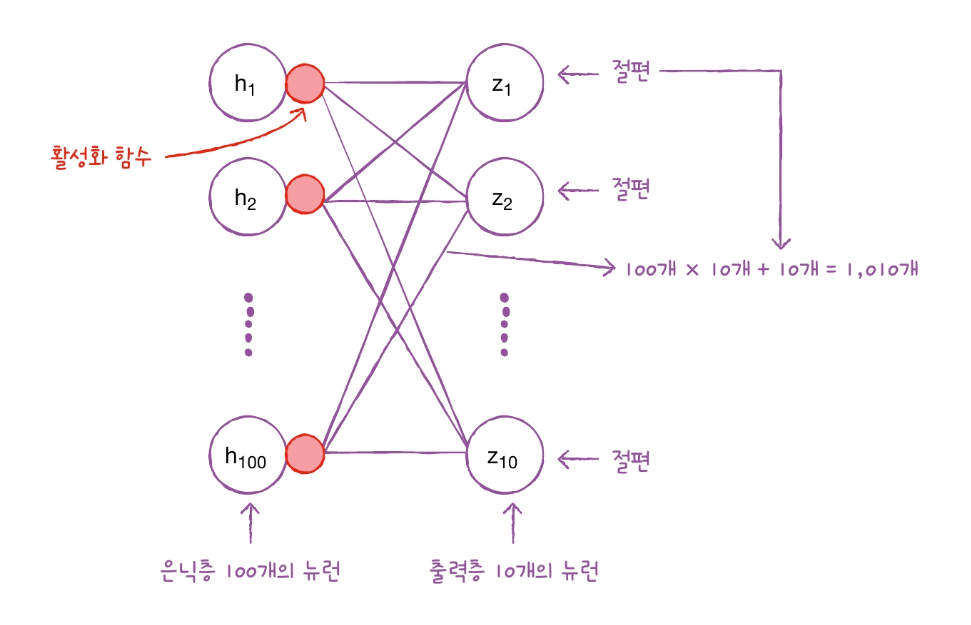

## 층을 추가하는 다른 방법
* Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만들수도 있습니다. 

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden1'),
    keras.layers.Dense(100, activation='sigmoid',  name='hidden2'),
    keras.layers.Dense(100, activation='relu',  name='hidden3'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 hidden3 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


* Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가하는 방법

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
help(model.)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5631 - accuracy: 0.8088
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4092 - accuracy: 0.8522
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8654
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8713
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8773


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5, batch_size=48000)

Epoch 1/5
1/1 [==============================] - 1s 921ms/step - loss: 0.3081 - accuracy: 0.8882
Epoch 2/5
1/1 [==============================] - 0s 261ms/step - loss: 0.3732 - accuracy: 0.8604
Epoch 3/5
1/1 [==============================] - 0s 288ms/step - loss: 0.3063 - accuracy: 0.8897
Epoch 4/5
1/1 [==============================] - 0s 309ms/step - loss: 0.3020 - accuracy: 0.8905
Epoch 5/5
1/1 [==============================] - 0s 243ms/step - loss: 0.3044 - accuracy: 0.8909


In [13]:
train_scaled.shape

(48000, 784)

In [14]:
train_scaled.shape[0] / 32

1500.0

??? 왜 나눔 기억안남

model.weights

## 렐루 활성화 함수
* 렐루 함수는 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수입니다. 
* 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워집니다. 렐루함수는 이런 문제가 없으며 계산도 간단합니다. 
-----
* Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 합니다. 곱해지는 가중치나 절편은 없습니다. 
* Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부릅니다. Flatten 층은 다음 코드처럼 입력층 바로 뒤에 추가합니다. 

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='oftmasx'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
train_scaled.shape

(48000, 28, 28)

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled1 = train_input / 255.0

train_scaled1, val_scaled, train_target, val_target = train_test_split(
    train_scaled1, train_target, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled1, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3069 - accuracy: 0.8897
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8945
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2897 - accuracy: 0.8967
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.9010
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2725 - accuracy: 0.9049


In [22]:
train_scaled1.shape

(48000, 28, 28)

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3969 - accuracy: 0.8810


[0.3969431519508362, 0.8809999823570251]

## 옵티마이저
* 케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개입니다. 
* fit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있습니다. 
* 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용합니다. 
* 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공합니다. 이들을 옵티마이저(Optimizer)라고 부릅니다. 

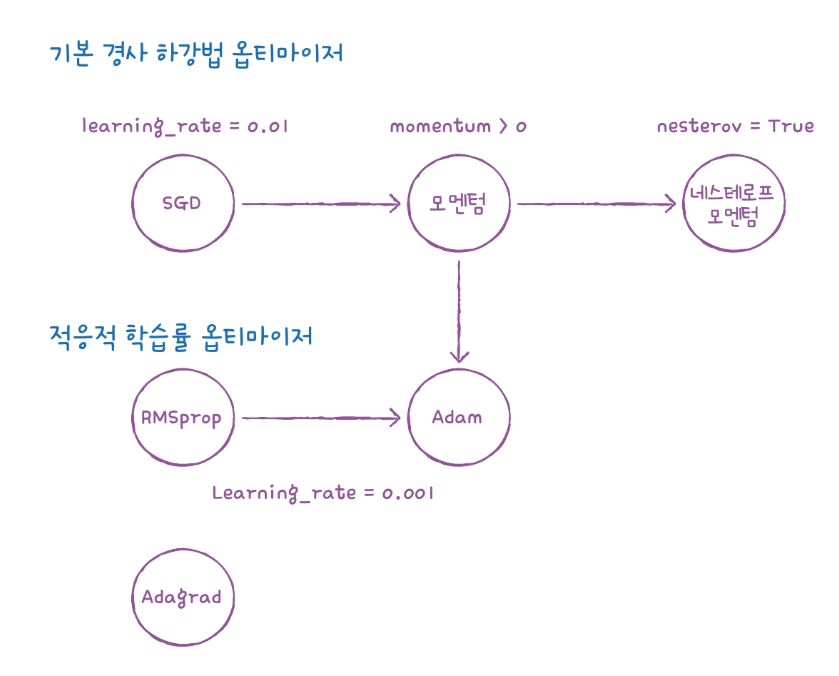

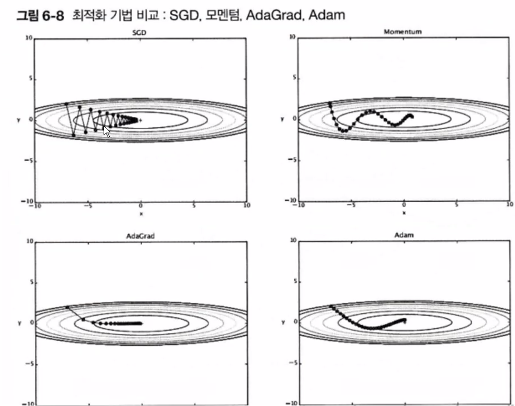

help(model.compile)

In [44]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

* 옵티마이저의 SGD 클래스를 사용하면 학습률등, 파라미터 값을 변경할 수 있습니다. 

In [46]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

* 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공합니다. SGD 클래스의 momentum 매개변수의 기본값은 0입니다. 
* 0보다 큰 값으로 지정하면 마치 이전의 그레디언트를 가속도처럼 사용하는 모멘텀 최적화(momentum optimization)를 사용합니다. 
* 보통 momentum 매개변수는 0.9 이상을 지정합니다. 
* 다음처럼 SGD 클래스의 nesterov 매개변수를 기본값으로 False에서 True로 바꾸면 네스테로프 모멘텀 최적화(네스테로프 가속 경사)를 사용합니다. 
* 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현합니다. 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공합니다. 

In [47]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7996 - accuracy: 0.7434
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5379 - accuracy: 0.8192
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4879 - accuracy: 0.8335
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4609 - accuracy: 0.8419
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4424 - accuracy: 0.8486


* 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있습니다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높습니다. 
* 이런 학습률을 적응적 학습률(adaptive learning rate)이라고 합니다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점입니다. 

* 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop이 있습니다. 
* 각각 compile() 메서드의 optimizer 매개변수에 'adagrad'와 'rmsprop'으로 지정할 수 있습니다. 
    * 기본값으로 rmsprop이 설정되어 있습니다. 

In [64]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [65]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [66]:
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [67]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2166 - accuracy: 0.6460
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7860 - accuracy: 0.7512
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6936 - accuracy: 0.7778
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6465 - accuracy: 0.7926
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6160 - accuracy: 0.8010


In [68]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [69]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [70]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [71]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5315 - accuracy: 0.8117
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3948 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3553 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3186 - accuracy: 0.8858


옵티마이저에 따라 성능이 다름
그래서 하나씩 해봐야함

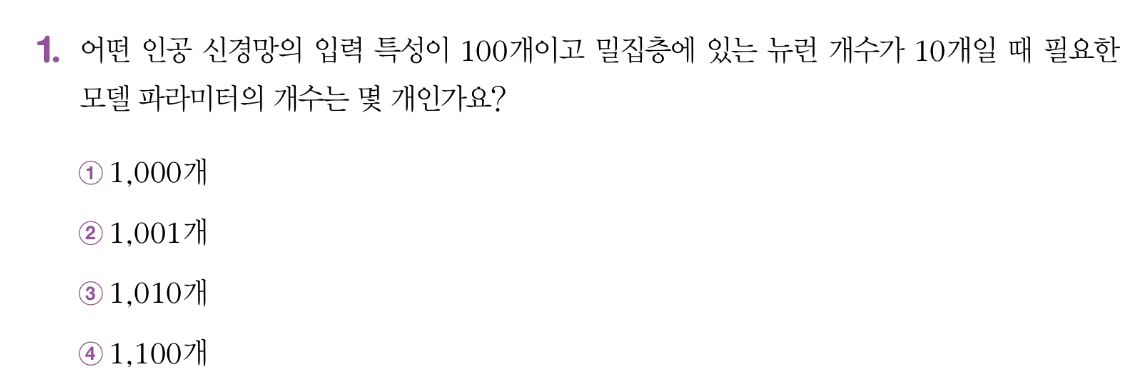

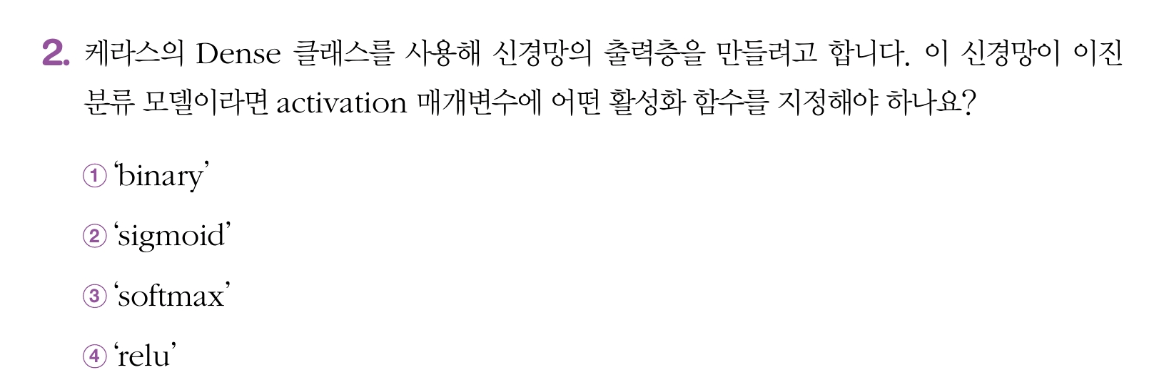

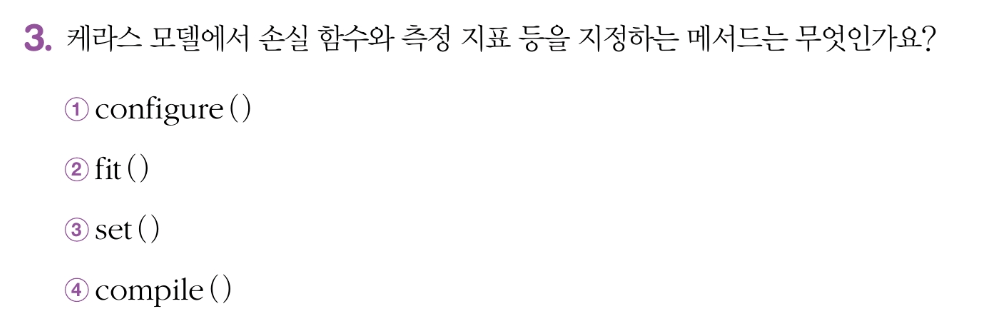

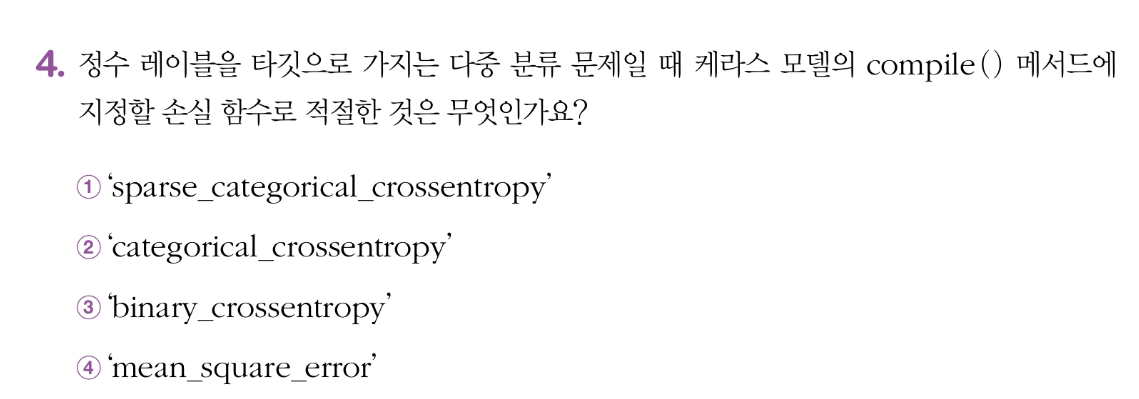

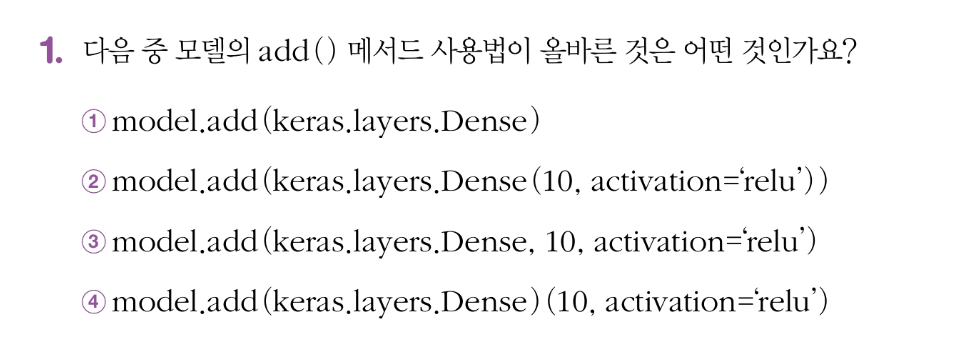

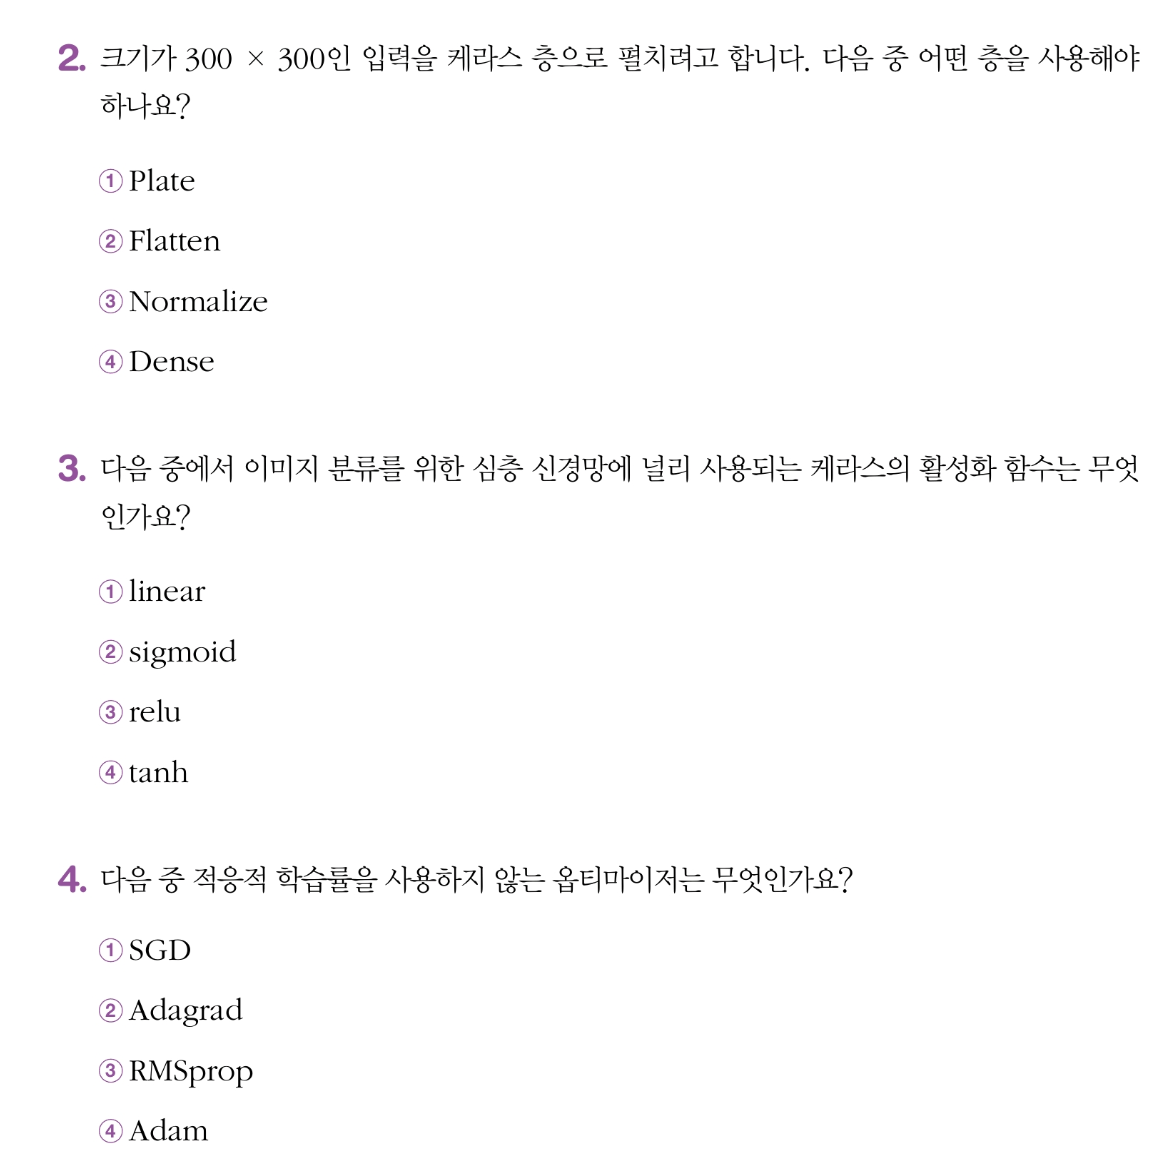

2
2
3
1